In [2]:
import pandas as pd

In [11]:
input_data = pd.read_csv('titanic_train.csv')
input_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
input_data['Survived'] = input_data['Survived'].astype('object')
input_data['Pclass'] = input_data['Pclass'].astype('object')
input_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
cross_tab_d = pd.crosstab(input_data.Sex, input_data.Survived)
cross_tab_d

Survived,0,1
Sex,,
female,81,233
male,468,109


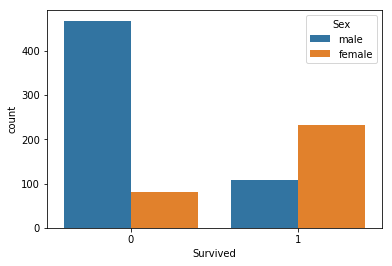

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.countplot(x='Survived', hue='Sex', data=input_data)

In [21]:
stats.chi2_contingency(cross_tab_d.values)

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

In [22]:
cross_tab_d = pd.crosstab( input_data.Pclass, input_data.Survived)
cross_tab_d

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


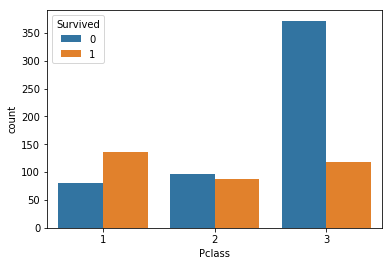

In [23]:
sns.countplot(x='Pclass', hue='Survived', data=input_data)

In [25]:
stats.chi2_contingency(cross_tab_d.values)

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [26]:
chi2, p, ddof, expected = stats.chi2_contingency(cross_tab_d.values)  

msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"    
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of Freedom: 2

[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


In [ ]:
# p-value < .05 => reject the H0

In [ ]:
#  p-value > .05 => Can not reject the H0

In [27]:
df_test = pd.DataFrame({'gend' : ['M','F','M','F','F','F','F','M','F','M', 'F'], 'dept' : ['Fin','Fin','Soft','Fin','Soft','Soft','Soft','Fin','Soft','Fin','Soft']})
df_test

,gend,dept
0,M,Fin
1,F,Fin
2,M,Soft
3,F,Fin
4,F,Soft
5,F,Soft
6,F,Soft
7,M,Fin
8,F,Soft
9,M,Fin


In [28]:
cross_tab_d = pd.crosstab( df_test.gend, df_test.dept)
cross_tab_d

dept,Fin,Soft
gend,,
F,2,5
M,3,1


In [29]:
chi2, p, ddof, expected = stats.chi2_contingency(cross_tab_d.values) 

msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n" 
print( msg.format( chi2, p, ddof ) )
print( expected )

Test Statistic: 0.7366071428571427
p-value: 0.3907499036204135
Degrees of Freedom: 1

[[3.18181818 3.81818182]
 [1.81818182 2.18181818]]


In [30]:
from scipy.spatial import distance

In [31]:
import numpy as np
df1 = pd.DataFrame(np.random.randn(4,3), columns=['a','b','c'], index=['e1','e2','e3','e4'])
df1

,a,b,c
e1,0.110663,0.344455,-0.091936
e2,0.107617,-0.471561,-0.456797
e3,0.561611,0.470612,0.996275
e4,-2.053456,-1.517112,-1.306593


In [32]:
distance.euclidean(df1.loc['e1'], df1.loc['e2'])

0.8938767162314176

In [33]:
distance.euclidean(df1.loc['e2'], df1.loc['e3'])

1.7903128999211877

In [34]:
from scipy.spatial.distance import pdist, squareform

In [35]:
distances = pdist(df1.values, metric='euclidean')  
distances 

array([0.89387672, 1.18468267, 3.10229523, 1.7903129 , 2.54667731,
       4.01158587])

In [36]:
dist_matrix = squareform(distances)
dist_matrix

array([[0.        , 0.89387672, 1.18468267, 3.10229523],
       [0.89387672, 0.        , 1.7903129 , 2.54667731],
       [1.18468267, 1.7903129 , 0.        , 4.01158587],
       [3.10229523, 2.54667731, 4.01158587, 0.        ]])